Импортируется библиотека pandas для работы с данными.



In [ ]:
import pandas as pd

Загрузка данных для анализа

In [ ]:
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

Вывод содержания

In [ ]:
salary.columns

Index(['Experience Years', 'Salary'], dtype='object')

Переменная y содержит целевую переменную (зарплату).

Переменная X содержит предиктор (годы опыта).

In [ ]:
y = salary['Salary']
X = salary[['Experience Years']]

Используется train_test_split из sklearn.model_selection для разделения данных на обучающую (70%) и тестовую (30%) выборки.
Устанавливается random_state для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

Импортируется LinearRegression из sklearn.linear_model.

Создается объект модели линейной регрессии.

Модель обучается на обучающих данных с помощью метода fit.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.intercept_
model.coef_


array([9405.61663234])

Модель используется для предсказания значений зарплаты на тестовой выборке с помощью метода predict. Результаты сохраняются в переменной y_pred.

In [ ]:
y_pred = model.predict(X_test)
ypred_2 =model.predict(X_train)
y_pred


array([ 90555.15441095,  59516.61952424, 106544.70268592,  64219.42784041,
        68922.23615658, 123474.81262412,  84911.78443155,  63278.86617718,
        65159.98950364,  61397.74285071,  37883.70126987,  50111.00289191])

Импортируются метрики для оценки качества модели: mean_absolute_error, mean_absolute_percentage_error и mean_squared_error из sklearn.metrics.
Рассчитываются и выводятся значения этих метрик для тестовой выборки:
Mean Absolute Error (MAE): средняя абсолютная ошибка, показывающая среднее отклонение предсказанных значений от фактических.

Mean Absolute Percentage Error (MAPE): средняя абсолютная процентная ошибка, показывающая среднее процентное отклонение предсказанных значений от фактических.

Mean Squared Error (MSE): средняя квадратичная ошибка, показывающая среднее значение квадратов отклонений предсказанных значений от фактических.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mean_absolute_error(y_test,y_pred)
mean_absolute_percentage_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)

24141421.671440993

Визуализация данных

In [ ]:
import matplotlib.pyplot as plt


Создается график, на котором:
Синими точками отображаются фактические значения зарплат в зависимости от лет опыта.

Красной линией отображаются предсказанные значения зарплат на тестовой выборке.

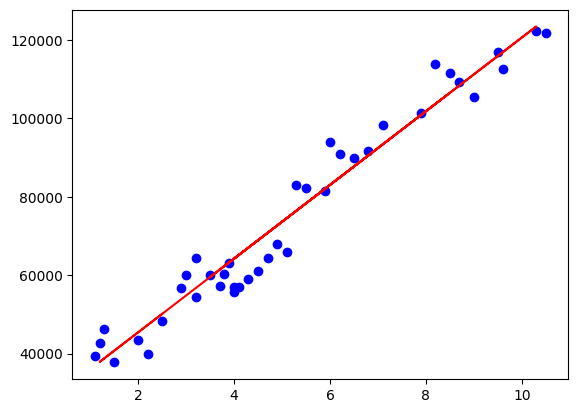

In [ ]:
plt.scatter(X,y,color='b')
plt.plot(X_test,y_pred,color='r')
plt.show()

1. Импорт библиотек:

Импортируются необходимые библиотеки: numpy, pandas, sklearn для машинного обучения, а также matplotlib и seaborn для визуализации.

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2. Загрузка данных:

Загружается набор данных о рыбах из указанного URL с помощью pd.read_csv.

In [16]:
data= pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/refs/heads/main/Fish.csv')

3. Подготовка данных:

Извлекаются характеристики рыб: вес (Weight), длина (Length1), высота (Height), ширина (Width) и вид (Species).

Создается массив param, который содержит значения всех характеристик рыб.

In [17]:
weight=data['Weight']
length=data['Length1']
height=data['Height']
width=data['Width']
sp=data['Species']
species =sp.values
param=np.array([weight.values,length.values,height.values,width.values]).T

4. Разделение данных:

Данные разделяются на обучающую (80%) и тестовую (20%) выборки с помощью train_test_split.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(param, species, test_size=0.2, random_state=42)


5. Линейный дискриминантный анализ (LDA):

Создается объект LDA и модель обучается на обучающих данных с помощью метода fit.

Выполняется предсказание классов для тестовой выборки с помощью метода predict.

In [30]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

6. Преобразование данных с помощью LDA:

Данные преобразуются в новое пространство с помощью метода transform, что позволяет визуализировать данные в двумерном пространстве.

In [31]:
X_lda = lda.transform(param)



7. Визуализация результатов LDA:

Создается график, на котором отображаются проекции данных на первых двух линейных дискриминантных компонентах (LD1 и LD2) с использованием seaborn.

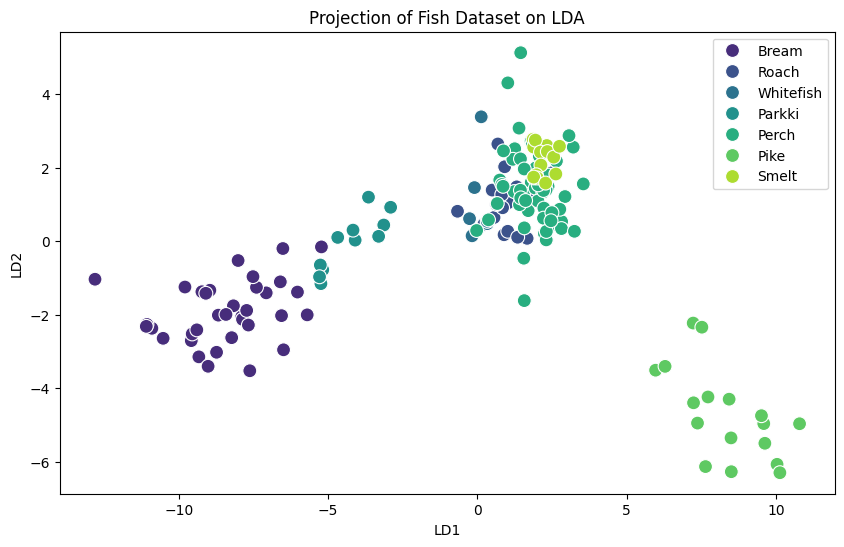

In [32]:
# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=species, palette='viridis', s=100)
plt.title("Projection of Fish Dataset on LDA")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()

8. Оценка качества модели LDA:

Выводится матрица ошибок (confusion matrix) и отчет о классификации (classification report) для оценки качества предсказаний модели на тестовой выборке.

In [21]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("nClassification Report:n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  8  0  1  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  0  2  0  0]]
nClassification Report:n               precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.80      0.89      0.84         9
        Pike       1.00      1.00      1.00         3
       Roach       0.00      0.00      0.00         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.84        32
   macro avg       0.69      0.70      0.69        32
weighted avg       0.82      0.84      0.83        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Метод ближайших соседей

In [22]:
from sklearn import neighbors, metrics

Создается объект KNN с 3 ближайшими соседями и модель обучается на всех данных.

In [33]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn = clf.fit(param,species)

Рассчитывается точность модели на всех данных с помощью метода score.

In [34]:
knn.score(param, species)

0.7547169811320755

Выполняется предсказание классов для тестовой выборки

In [35]:
prediction = knn.predict(X_test)

выводится матрица ошибок для KNN.

In [36]:
metrics.confusion_matrix(y_test,prediction)

array([[10,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  8,  0,  0,  0,  0],
       [ 0,  0,  2,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  1,  0,  0,  0,  2]])